In [1]:
#import Data_Processor as dp
import os
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)
# month(start,end)
# search(data,keywords)
# LDA(data, topics, words,otherwords)
# NMF(data,topics,words,otherwords)
# double(data,keyword_list)
# trend(data,hint,keyword_list)
# all_trend(metadata,hint,keyword_list)
# show(entity,month,keyword) # for all_trend
# classify(monthdata)

In [3]:
def dsearch(data,have,nhave):
    result=[]
    for i in data:
        s=0
        for j in have:
            if j in i['text'].lower():
                s=1
        for j in nhave:
            if j in i['text'].lower():
                s=0
        if s:
            result.append(i)
    return result

def lsum(l):
    if type(l[0])!=list:
        return l
    result=[]
    for i in l:
        result+=i
    return result

def mean(data):
    temp1,temp2=0,0
    for i in data:
        temp1+=i['positive']
        temp2+=i['negative']
    return temp1/max(len(data),1),temp2/max(len(data),1)

from wordcloud import WordCloud, STOPWORDS
def wordcloud(data,max_words=30,otherwords={},width = 500, height = 500):
    matplotlib.rcParams['figure.dpi'] = 100
    wordcloud = WordCloud(width = width, height = height, max_words=max_words,
                background_color ='white',
                stopwords = STOPWORDS.union(otherwords)).generate(' '.join([i['text'].lower() for i in data]))
    plt.axis('off')
    plt.imshow(wordcloud)

In [4]:
msdata=[]
m=month('2017-06','2020-05')
root_path=os.getcwd()
temp=os.listdir(root_path+'\\MS_weekly')
'''
for i in temp:
    msdata.append(total_clean(json.load(open(root_path+'\\MS_weekly\\'+i)))[:-1])
period=[]
for i in msdata:
    period+=i
'''

"\nfor i in temp:\n    msdata.append(total_clean(json.load(open(root_path+'\\MS_weekly\\'+i)))[:-1])\nperiod=[]\nfor i in msdata:\n    period+=i\n"

In [5]:
def read_data(path):
    structure=list(os.walk(path))
    summary=[]
    for i in structure:
        if not i[1]:
            temp=[]
            for j in i[2]:
                #print(i[0]+'\\'+j)
                #temp.append([(x['text'],x['positive'],x['negative']) for x in anothertemp])
                temp.append([{'text':x['text'],'positive':x['positive'],'negative':x['negative'],
                              'likes':x['likes'],'replies':x['replies'],'screen_name':x['screen_name'],
                              'tweet_url':x['tweet_url'],} for x in remove_rubbish(json.load(open(i[0]+'\\'+j))[:-1])])
            summary.append(temp)
    #return summary
    def lsum(list_):
        result=[]
        num=len(list_[0])
        for i in range(num):
            temp=[]
            for j in list_:
                temp+=j[i]
            result.append(temp)
        return result
    return lsum(summary)
category=os.listdir(root_path+'\\SentiStrength\\final')
metadata=[]
for i in category:
    metadata.append([])
    metadata[-1]=read_data(root_path+'\\SentiStrength\\final\\'+i)

In [6]:
def andsearch(data,keywords):
    result=[]
    for i in data:
        mark=1
        for j in keywords:
            if j not in i['text'].lower():
                mark=0
        if mark:
            result.append(i)
    return result

In [7]:
'''
model = gensim.models.Word2Vec.load('D')
for item, prob in model.wv.most_similar(['advisor',], topn=30)[:10]:
    print(item, prob)
def median(num):
    x=np.median(np.abs(np.array(num)-np.median(num)))
    return [np.median(num)-2*x for i in range(36)],[np.median(num)+2*x for i in range(36)]
'''

"\nmodel = gensim.models.Word2Vec.load('D')\nfor item, prob in model.wv.most_similar(['advisor',], topn=30)[:10]:\n    print(item, prob)\ndef median(num):\n    x=np.median(np.abs(np.array(num)-np.median(num)))\n    return [np.median(num)-2*x for i in range(36)],[np.median(num)+2*x for i in range(36)]\n"

In [8]:
len(metadata)

4

In [9]:
json.load(open('jp1.json'))[0]

{'has_media': True,
 'hashtags': ['HSBC', 'JPMorgan'],
 'img_urls': ['https://pbs.twimg.com/media/EMRHKZ9U0AAwinq.jpg'],
 'is_replied': False,
 'is_reply_to': False,
 'likes': 2,
 'links': ['https://www.financialexpress.com/industry/hsbc-jpmorgan-used-bank-of-england-audio-feed-now-under-probe-says-report/1800423/'],
 'parent_tweet_id': '',
 'replies': 0,
 'reply_to_users': [],
 'retweets': 1,
 'screen_name': 'FinancialXpress',
 'text': '#HSBC, #JPMorgan used Bank of England audio-feed now under probe, says report https://www.financialexpress.com/industry/hsbc-jpmorgan-used-bank-of-england-audio-feed-now-under-probe-says-report/1800423/\xa0…pic.twitter.com/lfiaLkayuf',
 'text_html': '<p class="TweetTextSize js-tweet-text tweet-text" data-aria-label-part="0" lang="en"><a class="twitter-hashtag pretty-link js-nav" data-query-source="hashtag_click" dir="ltr" href="/hashtag/HSBC?src=hash"><s>#</s><b>HSBC</b></a>, <a class="twitter-hashtag pretty-link js-nav" data-query-source="hashtag_clic

In [10]:
rb=read_data(root_path+'\\SentiStrength\\final\\Discount Brokerage\\Robinhood')
et=read_data(root_path+'\\SentiStrength\\final\\Discount Brokerage\\eTrade')

## Market scale

In [11]:
def usergrowth(data):
    result=[1]
    for i in data:
        temp=len(set())
def f(i):
    return len(set([x['screen_name'] for x in i]))

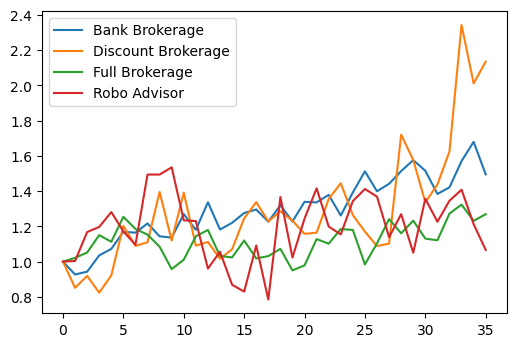

In [12]:
matplotlib.rcParams['figure.dpi']=100
for j in range(4):
    result=[]
    for i in metadata[j]:
        result.append(f(i))
    plt.plot(np.array(result)/result[0],label=category[j])
plt.legend()
plt.show()

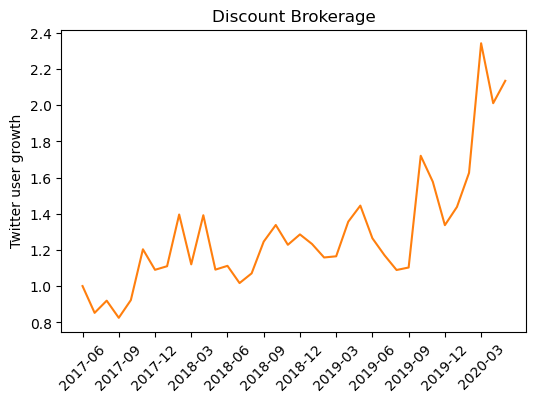

In [13]:
matplotlib.rcParams['figure.dpi']=100
result=[]
for i in metadata[1]:
    result.append(f(i))
fig,ax=plt.subplots()    
ax.plot(np.array(m),np.array(result)/result[0],color='C1')
ax.set_xticks(np.arange(36))
ax.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
for t in ax.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
plt.ylabel('Twitter user growth')
plt.title('Discount Brokerage')
plt.show()

## tweets

In [14]:
def sample(data,total):
    num=np.array([len(i) for i in data])
    freq=(num/np.sum(num)*total).astype(int)
    return [list(np.random.choice(i,freq[x])) for x,i in enumerate(data)]
def narrow(data):
    result=[]
    for j in data:
        result.append([])
        for i in j:
            if i['positive']>=3 or i['negative']<=-3:
                result[-1].append(i)
    return result

In [15]:
np.random.seed(123)
rbs=sample(narrow(rb),450)
ets=sample(narrow(et),450)

In [16]:
[(i,x) for i,x in enumerate(lsum(rbs))]

[(0,
  {'text': 'Reading Hood by StephenLawhead and the writing is exquisite May have found a new author love ',
   'positive': 3,
   'negative': -1,
   'likes': 2,
   'replies': 0,
   'screen_name': 'yolanda_smith_',
   'tweet_url': '/yolanda_smith_/status/875140441150300164'}),
 (1,
  {'text': 'Except its distinctly unlike terrorist attacks around the world In timing in type of attack in the targets So',
   'positive': 1,
   'negative': -4,
   'likes': 0,
   'replies': 1,
   'screen_name': 'EllieMellie1',
   'tweet_url': '/EllieMellie1/status/874910431227326464'}),
 (2,
  {'text': 'He started my obsession with robinhood type movies and pirates',
   'positive': 1,
   'negative': -3,
   'likes': 1,
   'replies': 2,
   'screen_name': 'CarpeMagica',
   'tweet_url': '/CarpeMagica/status/877397047015481344'}),
 (3,
  {'text': 'Robinhood APP Lock in Day Trading Loss with Stock Market PANIC SELL OFF ',
   'positive': 1,
   'negative': -3,
   'likes': 1,
   'replies': 0,
   'screen_name': 'gl

``C:\Users\rfmen\Desktop\Competition\7.15 discount.txt``

In [17]:
temp=[]
rawets=lsum(ets)
for i in os.listdir(root_path+'\\data\\eTrade'):
    temp+=json.load(open(root_path+'\\data\\eTrade\\'+i))
indexlist=[i['tweet_url'] for i in lsum(ets)]
for x in temp:
    if x['tweet_url'] in indexlist:
        rawets[indexlist.index(x['tweet_url'])]['raw']=x['text']

In [18]:
list(enumerate(rawets))

[(0,
  {'text': 'What a great idea',
   'positive': 3,
   'negative': -1,
   'likes': 0,
   'replies': 1,
   'screen_name': 'SkyBarker7',
   'tweet_url': '/SkyBarker7/status/877918718986039296',
   'raw': 'What a great idea!!!'}),
 (1,
  {'text': 'Love the new etrade commercial FIRST CLASSsomeone there has a sense of Its appreciated ',
   'positive': 3,
   'negative': -1,
   'likes': 2,
   'replies': 1,
   'screen_name': 'pinocchios',
   'tweet_url': '/pinocchios/status/880149899886682113',
   'raw': "Love the new @etrade commercial. FIRST CLASS...someone there has a sense of #humor. It's appreciated!!! #ALLIN"}),
 (2,
  {'text': 'IB and Etrade have been horrible for shorts Done with them both',
   'positive': 1,
   'negative': -4,
   'likes': 0,
   'replies': 1,
   'screen_name': 'firemanwill28',
   'tweet_url': '/firemanwill28/status/876893166586142720',
   'raw': 'IB and Etrade have been horrible for shorts. Done with them both.'}),
 (3,
  {'text': 'Phil Jackson wasnt able to reprod

In [19]:
def metasearch(metadata,keywords=['']):
    result=[]
    for i in range(len(metadata)):
        result.append([])
        for j in range(len(metadata[0])):
            result[-1].append(search(metadata[i][j],keywords))
    return result
def metaratio(metadata,keywords=['']):
    temp=metasearch(metadata,keywords)
    result=[]
    for i in range(len(temp)):
        result.append(len(lsum(temp[i]))/len(lsum(metadata[i])))
    return result
def metafreq(metadata,keywords=['']):
    temp=metasearch(metadata,keywords)
    result=[]
    for i in range(len(temp)):
        result.append(len(lsum(temp[i])))
    return result
def metascore(metadata,keywords=[''],hint=0):
    temp=metasearch(metadata,keywords)
    result=[]
    for i in range(len(temp)):
        cnt=0
        for j in lsum(temp[i]):
            if hint==0 and j['positive']>=-1.5*j['negative']:
                cnt+=1
            elif hint==1 and 1.5*j['positive']<=-j['negative']:
                cnt+=1
        result.append(cnt/len(lsum(temp[i])))
    return result

In [20]:
temp=list(os.walk(os.getcwd()+'\\SentiStrength\\final\\Discount Brokerage'))
discount=[]
for i in temp:
    if not i[1]:
        discount.append([])
        for j in i[2]:
            discount[-1].append(json.load(open(i[0]+'\\'+j))[:-1])
company=temp[0][1]
company

['Charles Schwab',
 'eTrade',
 'Fidelity',
 'InteractiveBrokers',
 'Robinhood',
 'TD Ameritrade',
 'Tradestation']

In [21]:
a=np.array(metaratio(discount,['beginner','newbie']))
b=np.array(metaratio(discount,[' trader']))
c=np.array(metaratio(discount,['investor']))

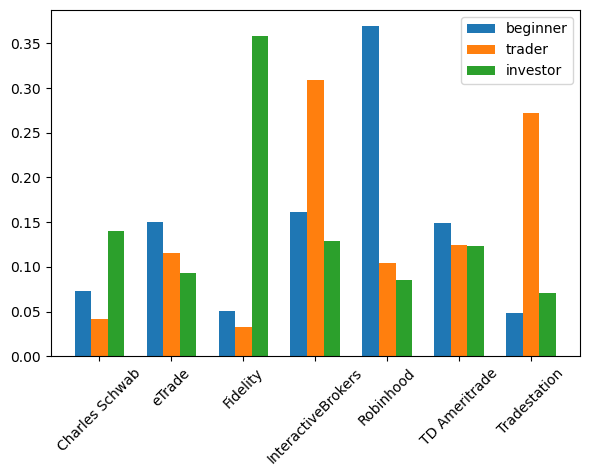

In [22]:
fig, ax = plt.subplots()
x=np.arange(len(a))
width = 0.23
rects1 = ax.bar(x - width, a/sum(a), width, label='beginner')
rects2 = ax.bar(x , b/sum(b), width, label='trader')
rects3 = ax.bar(x + width, c/sum(c), width, label='investor')
ax.legend()
'''
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.around(height*100),2),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
'''
fig.tight_layout()
plt.xticks(np.arange(7),company,rotation=45)
plt.show()

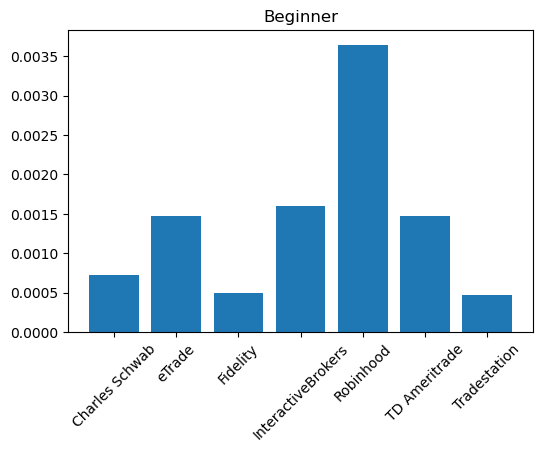

In [23]:
plt.bar(np.arange(7),a)
plt.xticks(np.arange(7),company,rotation=45)
plt.title('Beginner')
plt.show()

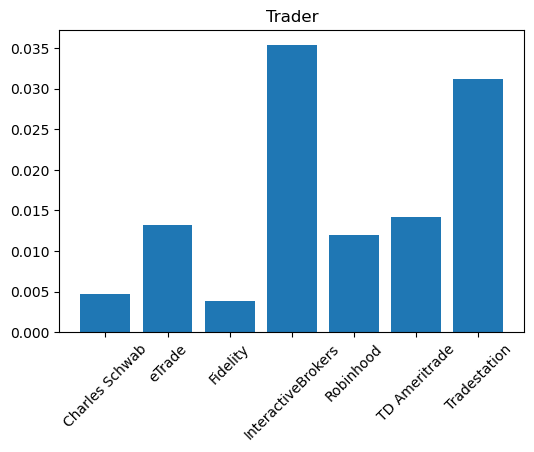

In [24]:
plt.bar(np.arange(7),b)
plt.xticks(np.arange(7),company,rotation=45)
plt.title('Trader')
plt.show()

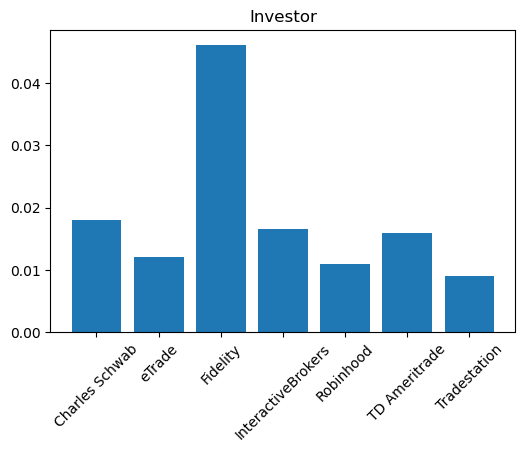

In [25]:
plt.bar(np.arange(7),c)
plt.xticks(np.arange(7),company,rotation=45)
plt.title('Investor')
plt.show()

In [26]:
af=np.array(metafreq(discount,['beginner','newbie']))
bf=np.array(metafreq(discount,[' trader']))
cf=np.array(metafreq(discount,['investor']))

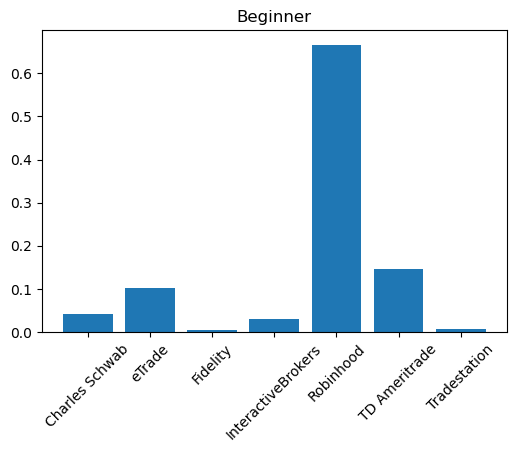

In [27]:
plt.bar(np.arange(7),af/sum(af))
plt.xticks(np.arange(7),company,rotation=45)
plt.title('Beginner')
plt.show()

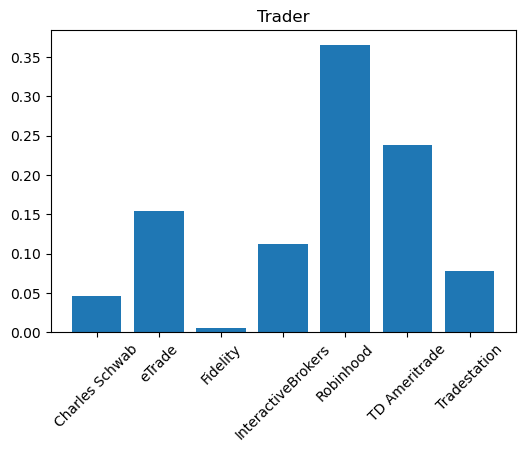

In [28]:
plt.bar(np.arange(7),bf/sum(bf))
plt.xticks(np.arange(7),company,rotation=45)
plt.title('Trader')
plt.show()

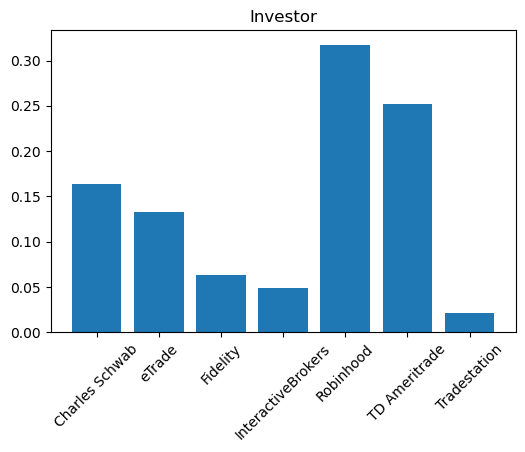

In [29]:
plt.bar(np.arange(7),cf/sum(cf))
plt.xticks(np.arange(7),company,rotation=45)
plt.title('Investor')
plt.show()

In [30]:
print(sum(af)/(sum(af)+sum(bf)+sum(cf)),sum(bf)/(sum(af)+sum(bf)+sum(cf)),sum(cf)/(sum(af)+sum(bf)+sum(cf)))

0.07511838140335772 0.44877313818338355 0.4761084804132587


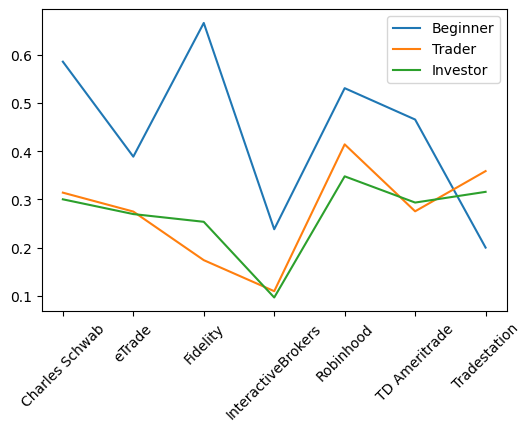

In [31]:
plt.plot(metascore(discount,['beginner','newbie']),label='Beginner')
plt.plot(metascore(discount,[' trader']),label='Trader')
plt.plot(metascore(discount,['investor']),label='Investor')
plt.xticks(np.arange(7),company,rotation=45)
plt.legend()
plt.show()

In [32]:
np.random.choice(text(search(lsum(discount[-3]),['beginner','newbie'])),100)

465


array(['Robinhood app for trading the Motley Fool website for beginner learning and advice ',
       'Try Robinhood its great for beginners',
       'Guys This shit is free and simple to use for first time stock newbies Join RobinhoodApp and well both get a share of stock like AAPL F or S for free Make sure to use my link ',
       'Thinking about trying the robinhood app Anybody used it Heard its good for beginners',
       'Investing Apps for Beginners ',
       'What platform do you use to execute your trades Risk management for beginners is tough because most beginner exchanges like coinbase and RobinhoodApp do not offer Stop Losses',
       'I like RobinhoodApps design but I wish it would make bad days feel less punishing Could scare risk aversenewbies into selling too quick',
       'Its been a long time coming lol But I went through fundrise for real estate Im a beginner so I called and they walked me through everything I dont know if you heard of Robinhood but theyre helpful an

In [33]:
metaratio(discount,['crypto','bitcoin','eth','btc'])

[0.040439898714065836,
 0.048306599026474155,
 0.15138522427440634,
 0.04662306054152723,
 0.07453065449583589,
 0.05831141354071363,
 0.05178179038884112]

In [34]:
metascore(discount,['crypto','bitcoin','eth','btc'])

[0.3014119091467158,
 0.25637755102040816,
 0.1786492374727669,
 0.05057096247960848,
 0.3272306397306397,
 0.25545476832557,
 0.3062730627306273]

In [35]:
#text(search(lsum(discount[2]),['crypto','bitcoin','eth','btc']))

In [36]:
metascore(discount,['beginner','newbie'])

[0.5862068965517241,
 0.3888888888888889,
 0.6666666666666666,
 0.23809523809523808,
 0.5311827956989247,
 0.46601941747572817,
 0.2]

In [37]:
metascore(discount,[' trader'])

[0.31413612565445026,
 0.2748447204968944,
 0.17391304347826086,
 0.10944206008583691,
 0.41442622950819674,
 0.27537688442211056,
 0.3588957055214724]

In [38]:
metaratio(discount,['retirement','ira'])

[0.014969465269847574,
 0.011460494156791061,
 0.038093667546174145,
 0.0069972619409796166,
 0.0057952602769805045,
 0.012108302836230558,
 0.0033438425527849433]

In [39]:
for j in discount:
    print(len(set([i['screen_name'] for i in j[-1]]))/len(set([i['screen_name'] for i in j[0]])))

2.834975369458128
2.7122507122507122
2.1587301587301586
3.8950617283950617
2.542437431991295
1.3604368932038835
4.333333333333333


In [40]:
for i in range(6):
    print(len(search(lsum(discount[i]),[' trader']))/len(lsum(discount[i])))

0.004741571917978253
0.013226806876296494
0.0037928759894459104
0.03544265287496197
0.011959095970764912
0.01422403934126258


In [41]:
#text(lsum(metasearch(discount,['integration'])[0]))

## fee

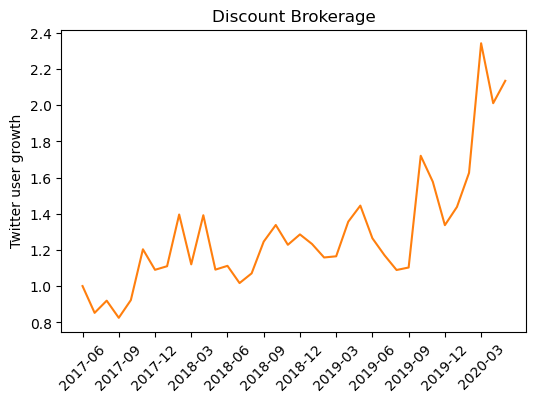

In [42]:
matplotlib.rcParams['figure.dpi']=100
result=[]
for i in metadata[1]:
    result.append(f(i))
fig,ax=plt.subplots()    
ax.plot(np.array(m),np.array(result)/result[0],color='C1')
ax.set_xticks(np.arange(36))
ax.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
for t in ax.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
plt.ylabel('Twitter user growth')
plt.title('Discount Brokerage')
plt.show()

In [43]:
pos=[]
for i in metadata[1]:
    temp=0
    for j in i:
        if j['positive']>=-1.5*j['negative']:
            temp+=1
    pos.append(temp/len(i))

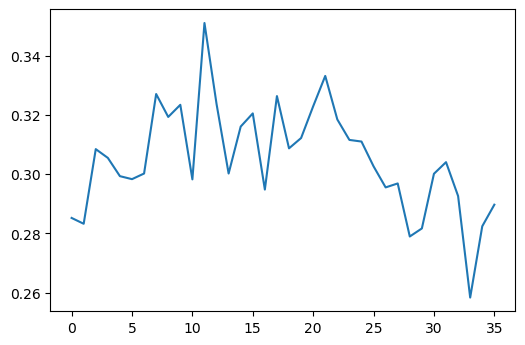

In [44]:
plt.plot(pos)

In [45]:
text(extreme(search(metadata[1][28],['commission','fee'])))

65


['As Schwab TD America are Robinhooded should crypto brokers worry about fee compression enricomolinari stratorob BarkowConsult cgledhill',
 'As a grown adult there is no excuse why you havent started building an investment portfolio etradeTDAmeritradeRobinhoodApp NO minimum account balance  commission fees  or  a week just fund that account',
 'AskWellsFargo You never provided a response to my previous tweet are you guys planning on eliminating commission fees for online trading like Charles Schwab TDAmeritrade and now Etrade',
 'BREAKING TDAmeritrade CharlesSchwab and etrade down between  as of pm EST Analysts say executive resignations and zero commission trade announcements are triggering the Brokerage Bloodbath Is the market overreacting Time to buy low',
 'Beginning Oct  ETrade will offer zero commissions on stocks exchangetraded funds and options listed on US exchanges via WSJ LisaBeilfuss etrade',
 'CEO Tim Hockey says Schwabs zerocommission play was painful but helped TD Ameri

In [46]:
text((search(metadata[1][-6],['commission','fee'])))

410


[' Interactive Brokers Lowest commissions  TD Ameritrade Best options tools  TradeStation Wellrounded offering My broker is TradeStation ',
 ' Robinhood Fidelity Robinhood is better in terms of UX but fidelity better for overall trading and investing Both offer tradefree commission',
 ' TDAmeritrade charges a typical  wire transfer fee But if you wire out your entire account it becomes a  fee fixes this ffs The customer support rep I talked to was actually super cool At the end he asked if I needed anything else I told ',
 ' Thinking people and regular folks feel it every day steals from the poor to give to the rich Hes the antiRobinhood ',
 ' also have ATMs with English menus and s are literally everywhere If you want to save on foreign atm fees Id recommend opening an account with Charles Schwab because they reimburse you for all atm fees',
 ' at least interactive brokers acknowledges the scam and tells people will give you zero commissions but your orders will never get to the marke

In [47]:
text((search(discount[-3][28],[' api'])))

8


[' using the robinhood unofficial api to create an app that would allow me to stay fully invested in crypto So it would sell exactly how much I needed to pay for something on their debit card Almost like paying for stuff in crypto wherever Mastercard is accepted RobinhoodApp',
 'And alphavantage is a great choice to use market data through API',
 'Now that most brokers offer free commissions I really hope RobinhoodApp starts offering a public API',
 'Some people will do some digging and find out that Robinhood used to have an API PLEASE DONT USE IT A LOT of people were burned by it and lost a lot of money since it isnt supported RobinhoodApp is great at what they do but AlpacaHQ is what you want for automation ',
 'Squares Robinhood competitor and Robinhoods Square competitor are rented from API providers delegating billions plus  short takes on top developments by LexSokolin',
 'Tech environment leading to digitization of and as a result products are being atomized and made digital Sq

In [48]:
sorted([(i['text'],i['likes'],i['tweet_url']) for i in metadata[1][-3]],key=lambda x: -x[1])

[('Someone tell the Robinhood team its Daylight Savings tomorrow',
  3197,
  '/typicalVC/status/1236387214415675393'),
 ('love getting a bunch of hustlebrained entrepreneursuckers defending Elon Musk in my replies today havent you been paying attention dipshits your entire worldview is in shambles whatever fuckin CBD energy bars you were running out of the garage is over check your etrade',
  1073,
  '/jackallisonLOL/status/1240712227155406848'),
 ('Some action decorative shots I did for Robin Hood movie Years ago ',
  1033,
  '/DarekZabrocki/status/1239244249725653001'),
 ('Lets spread some cheer today Show us your best beauty shots of TD Ameritrade Park ',
  485,
  '/tdameritradeprk/status/1240668623552876545'),
 ('Downloaded Robinhood now that the market crashed ITS TIME TO MAKE SOME MONEY BOYS what to buy first Obamacare Internet Pizza stocks are sure to rise due to quarantine The possibilities are endless',
  336,
  '/ForeheadFables/status/1241352946031439872'),
 (' Maid Marian Su

In [49]:
temp=[search(i,['commission',]) for i in metadata[1]]

In [50]:
for i in temp:
    print(len(i))

53
54
61
39
93
86
63
131
112
80
84
87
83
117
137
114
113
71
81
122
103
114
109
128
103
103
95
118
1604
307
133
197
177
230
139
181


### data try

In [51]:
temp=[[search(j,['commission']) for j in i] for i in discount]

In [52]:
for i in range(36):
    print([len(temp[j][i]) for j in range(7)])

[1, 8, 0, 2, 35, 6, 1]
[4, 2, 0, 2, 33, 9, 4]
[1, 7, 0, 2, 40, 11, 0]
[0, 8, 0, 3, 14, 12, 2]
[2, 11, 0, 2, 23, 54, 1]
[3, 37, 0, 2, 33, 11, 0]
[3, 8, 0, 4, 35, 12, 1]
[4, 21, 1, 11, 61, 31, 2]
[6, 20, 0, 3, 64, 17, 2]
[7, 7, 0, 6, 40, 15, 5]
[8, 6, 2, 6, 51, 8, 3]
[6, 15, 0, 4, 51, 7, 4]
[3, 10, 1, 7, 37, 18, 7]
[8, 15, 0, 6, 61, 22, 5]
[7, 16, 0, 8, 71, 32, 3]
[3, 11, 1, 10, 66, 17, 6]
[6, 7, 0, 9, 64, 20, 7]
[1, 5, 0, 12, 38, 10, 5]
[4, 11, 0, 11, 36, 15, 4]
[5, 10, 0, 16, 65, 21, 5]
[18, 9, 3, 14, 38, 18, 3]
[1, 10, 0, 19, 63, 19, 2]
[3, 11, 0, 12, 72, 11, 0]
[11, 6, 13, 13, 42, 37, 6]
[5, 15, 2, 20, 24, 33, 4]
[7, 10, 0, 12, 47, 19, 8]
[3, 8, 0, 7, 61, 12, 4]
[4, 6, 0, 53, 40, 14, 1]
[386, 414, 19, 122, 192, 431, 40]
[73, 35, 0, 34, 66, 91, 8]
[19, 8, 3, 16, 56, 29, 2]
[34, 31, 0, 22, 55, 52, 3]
[25, 35, 5, 21, 34, 50, 7]
[30, 48, 0, 21, 42, 67, 22]
[15, 27, 0, 17, 32, 41, 7]
[12, 41, 1, 12, 63, 44, 8]


In [53]:
for i in range(36):
    print([len(search(discount[j][i],['otc'])) for j in range(7)])

[2, 7, 0, 2, 7, 7, 0]
[1, 2, 0, 2, 3, 7, 0]
[1, 8, 0, 2, 9, 15, 1]
[2, 7, 0, 0, 13, 10, 1]
[4, 5, 0, 0, 11, 8, 1]
[1, 80, 0, 0, 9, 11, 1]
[0, 6, 0, 4, 7, 16, 1]
[9, 27, 0, 3, 13, 20, 1]
[1, 12, 0, 3, 15, 4, 0]
[0, 12, 0, 2, 9, 9, 0]
[4, 14, 0, 0, 12, 5, 0]
[2, 9, 1, 2, 9, 6, 0]
[4, 15, 3, 4, 9, 12, 1]
[3, 4, 0, 1, 16, 8, 0]
[4, 11, 1, 2, 7, 3, 2]
[1, 11, 1, 1, 15, 6, 1]
[1, 22, 1, 2, 6, 11, 1]
[0, 7, 0, 4, 7, 19, 1]
[4, 13, 0, 3, 17, 11, 1]
[1, 4, 1, 1, 7, 4, 1]
[1, 6, 2, 2, 15, 9, 2]
[7, 10, 0, 4, 6, 11, 0]
[2, 9, 0, 5, 11, 8, 0]
[4, 13, 0, 2, 8, 10, 2]
[3, 21, 0, 3, 7, 7, 1]
[2, 18, 0, 2, 8, 6, 1]
[3, 39, 0, 3, 9, 7, 2]
[1, 8, 0, 3, 8, 9, 0]
[73, 227, 0, 2, 15, 90, 3]
[10, 12, 1, 2, 12, 16, 2]
[6, 9, 1, 3, 7, 14, 2]
[8, 20, 1, 4, 6, 12, 0]
[5, 16, 2, 3, 5, 15, 1]
[6, 22, 0, 5, 9, 14, 1]
[6, 24, 0, 8, 12, 22, 4]
[5, 32, 0, 2, 14, 26, 3]


In [54]:
company

['Charles Schwab',
 'eTrade',
 'Fidelity',
 'InteractiveBrokers',
 'Robinhood',
 'TD Ameritrade',
 'Tradestation']

In [55]:
def likemean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        if i['likes']<=total/100:
            cnt+=1+i['likes']
            score+=(1+i['likes'])*i['positive']
        else:
            cnt+=1+total/100
            score+=(1+total/100)*i['positive']
    return score/max(1,cnt)

def replymean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1+i['replies']
        score+=(1+i['replies'])*i['positive']
    return score/max(1,cnt)

def retweetmean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1+i['retweets']
        score+=(1+i['retweets'])*i['positive']
    return score/max(1,cnt)

def mean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1
        score+=i['positive']
    return score/max(1,cnt)
def nmean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1
        score+=i['negative']
    return score/max(1,cnt)
def negratio(data):
    temp=0
    for i in data:
        if -i['negative']>=1.5*i['positive']:
            temp+=1
    return temp/max(len(data),1)
def posratio(data):
    temp=0
    for i in data:
        if i['positive']>=-i['negative']*1.5:
            temp+=1
    return temp/max(1,len(data))
def likenarrow(data):
    result=[]
    for i in data:
        if i['likes']:
            result.append(i)
    return result

In [56]:
for j in range(25,36):
    print([round(mean(search(lsum(discount[i][j]),['commission'])),2) for i in range(7)])

[1.71, 1.6, 0.0, 2.17, 1.57, 1.53, 1.75]
[1.33, 1.5, 0.0, 1.71, 1.54, 1.25, 1.25]
[1.5, 1.67, 0.0, 1.34, 1.75, 1.36, 2.0]
[1.51, 1.55, 1.26, 1.31, 1.59, 1.48, 1.45]
[1.48, 1.63, 0.0, 1.32, 1.7, 1.36, 1.88]
[1.79, 1.62, 1.67, 1.38, 1.86, 1.41, 1.5]
[1.41, 1.48, 0.0, 1.41, 1.6, 1.62, 2.33]
[1.64, 1.43, 1.4, 1.33, 1.76, 1.46, 1.43]
[1.7, 1.75, 0.0, 1.57, 1.81, 1.55, 1.77]
[1.53, 1.41, 0.0, 1.76, 1.66, 1.56, 1.43]
[2.0, 1.61, 1.0, 1.67, 1.68, 1.73, 1.0]


In [57]:
for m in range(25,36):
    print([round(posratio(discount[j][m]),2) for j in range(7)])

[0.32, 0.25, 0.23, 0.11, 0.34, 0.28, 0.37]
[0.33, 0.25, 0.23, 0.09, 0.34, 0.28, 0.32]
[0.34, 0.28, 0.31, 0.08, 0.31, 0.29, 0.38]
[0.28, 0.26, 0.28, 0.07, 0.31, 0.27, 0.25]
[0.3, 0.27, 0.33, 0.07, 0.31, 0.25, 0.39]
[0.31, 0.26, 0.29, 0.07, 0.33, 0.26, 0.37]
[0.32, 0.24, 0.3, 0.08, 0.35, 0.27, 0.43]
[0.31, 0.22, 0.29, 0.08, 0.35, 0.27, 0.31]
[0.28, 0.23, 0.26, 0.07, 0.3, 0.24, 0.32]
[0.29, 0.23, 0.23, 0.08, 0.34, 0.27, 0.36]
[0.29, 0.28, 0.31, 0.06, 0.33, 0.27, 0.35]


In [58]:
ratio=[[posratio(j) for j in i]for i in discount]
ratio=np.array(ratio)

In [59]:
a=np.mean(ratio[:,25:28],axis=1)
b=np.mean(ratio[:,28:31],axis=1)

In [60]:
unique([i['positive'] for i in metadata[1][-8]])

[(1, 7716, 59.5),
 (2, 3548, 27.36),
 (3, 1536, 11.84),
 (4, 165, 1.27),
 (5, 4, 0.03)]

In [61]:
6100/(6100+3548+1536+165+4)

0.537302915528935

In [62]:
unique([i['positive'] for i in metadata[1][-9]])

[(1, 4251, 57.73),
 (2, 2079, 28.24),
 (3, 938, 12.74),
 (4, 91, 1.24),
 (5, 4, 0.05)]

### graph 1

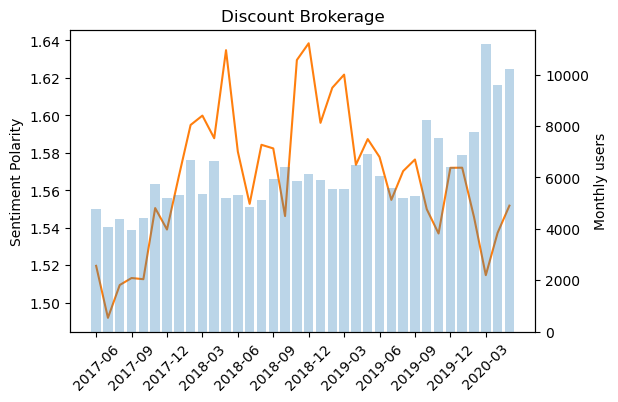

In [63]:
hint=0
m=month('2017-06','2020-05')
app=([mean(i) for i in metadata[1]],[mean(i) for i in metadata[1]],[f(i) for i in metadata[1]])
matplotlib.rcParams['figure.dpi'] = 100
fig, ax1 = plt.subplots()
ax1.plot(np.array(m),app[hint],color='C'+str(hint+1))
ax1.set_xticks(np.arange(36))
ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
ax1.set_ylabel('Sentiment Polarity')
for t in ax1.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax1.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
ax2 = ax1.twinx()
for t in ax2.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax2.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
ax2.set_xticks(np.arange(36))
ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
ax2.bar(m,app[2],alpha=0.3)
ax2.set_ylabel('Monthly users')
ax1.set_title('Discount Brokerage')
plt.show()

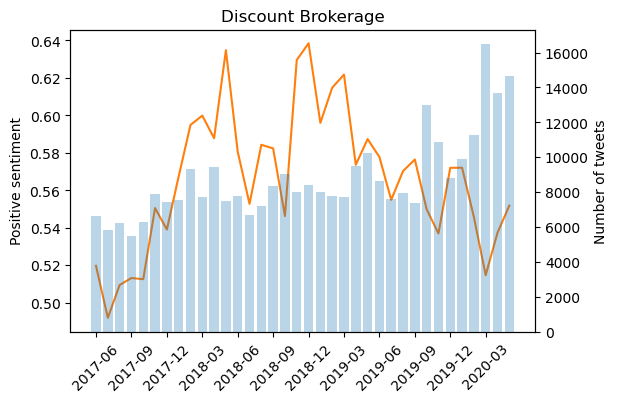

In [64]:
hint=0
m=month('2017-06','2020-05')
app=subanalyze(metadata[1])
matplotlib.rcParams['figure.dpi'] = 100
fig, ax1 = plt.subplots()
ax1.plot(np.array(m),np.array(app[hint])-1,color='C'+str(hint+1))
ax1.set_xticks(np.arange(36))
ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
ax1.set_ylabel('Positive sentiment')
for t in ax1.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax1.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
ax2 = ax1.twinx()
for t in ax2.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax2.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
ax2.set_xticks(np.arange(36))
ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
ax2.bar(m,app[2],alpha=0.3)
ax2.set_ylabel('Number of tweets')
ax1.set_title('Discount Brokerage')
plt.show()

In [65]:
unique([i['positive'] for i in metadata[1][-9]])

[(1, 4251, 57.73),
 (2, 2079, 28.24),
 (3, 938, 12.74),
 (4, 91, 1.24),
 (5, 4, 0.05)]

In [66]:
unique([i['positive'] for i in (metadata[1][-8])])

[(1, 7716, 59.5),
 (2, 3548, 27.36),
 (3, 1536, 11.84),
 (4, 165, 1.27),
 (5, 4, 0.03)]

In [67]:
search(metadata[1][-8],['commission'])

[{'text': 'Charles Schwab SCHW is currently  at  The stock is clearly mt bearish having fallen from the s Bullish zero commissions Earnings early Tues should be ',
  'positive': 1,
  'negative': -1,
  'likes': 2,
  'replies': 0,
  'screen_name': 'permabear_uk',
  'tweet_url': '/permabear_uk/status/1183505173236387840'},
 {'text': 'Section sectionfour profgalloway take on Charles Schwab cutting commissions from US equity and ETF trades Robinhood Apples new potential rundle Teslas valuation and investing in relationships ',
  'positive': 1,
  'negative': -1,
  'likes': 11,
  'replies': 1,
  'screen_name': 'MihaiEnescu14',
  'tweet_url': '/MihaiEnescu14/status/1185633391162449920'},
 {'text': 'Loving the free commission from big broker to ameritrade Charles schwab etrade What is stopping you to invest now',
  'positive': 4,
  'negative': -2,
  'likes': 3,
  'replies': 0,
  'screen_name': 'weonfire1',
  'tweet_url': '/weonfire1/status/1185610430024044544'},
 {'text': 'Charles Schwab is off

In [68]:
replymean(dsearch(metadata[1][-9],['commission'],['otc']))

1.4883720930232558

In [69]:
replymean(dsearch(metadata[1][-8],['commission'],['otc']))

1.5408122235625252

In [70]:
replymean(search(metadata[1][-9],['commission']))

1.4883720930232558

In [71]:
replymean(search(metadata[1][-8],['commission']))

1.532565671104714

### graph 2

In [72]:
before=[replymean(search(lsum(discount[i][-10:-8]),['commission'])) for i in range(7)]
after=[replymean(search(lsum(discount[i][-8:-6]),['commission'])) for i in range(7)]
before[2]=replymean(search(lsum(discount[2][:-8]),['commission']))
after[2]=replymean(search(lsum(discount[2][-8:]),['commission']))
print(before)
print(after)

[1.3333333333333333, 1.44, 1.1851851851851851, 1.4069767441860466, 1.6423841059602649, 1.3658536585365855, 1.5]
[1.546938775510204, 1.5394431554524362, 1.2439024390243902, 1.3584905660377358, 1.7099056603773586, 1.4735099337748345, 1.513157894736842]


In [73]:
before=np.array(before)
after=np.array(after)
companycopy=np.array(company.copy())

In [74]:
def retweetmean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1+i['retweets']
        score+=(1+i['retweets'])*i['positive']
    return score/max(1,cnt)

[1.2727272727272727, 1.434782608695652, 1.1081081081081081, 1.2545454545454546, 1.625, 1.303030303030303, 1.6666666666666667]
[1.5097813578826238, 1.5632754342431763, 1.2461538461538462, 1.3578274760383386, 1.646, 1.3346693386773547, 1.4918032786885247]


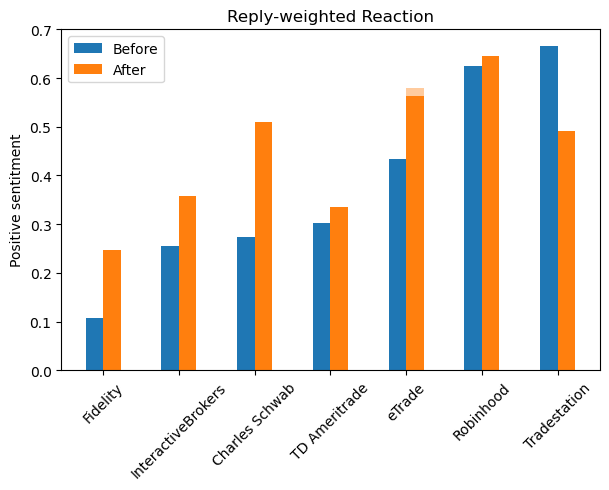

In [103]:
before=[retweetmean(search(lsum(discount[i][-10:-8]),['commission'])) for i in range(7)]
after=[retweetmean(search(lsum(discount[i][-8:-6]),['commission'])) for i in range(7)]
before[2]=retweetmean(search(lsum(discount[2][:-8]),['commission']))
after[2]=retweetmean(search(lsum(discount[2][-8:]),['commission']))
print(before)
print(after)

before=np.array(before)
after=np.array(after)

before1=before[np.argsort(before)]
after1=after[np.argsort(before)]
company1=companycopy[np.argsort(before)]

#before1[0],before1[5]=before1[5],before1[0]
#after1[0],after1[5]=after1[5],after1[0]
#company1[0],company1[5]=company1[5],company1[0]

after2=np.zeros(7)
after2[-3]=replymean(dsearch(lsum(discount[1][-8:-6]),['commission'],['otc']))-1

matplotlib.rcParams['figure.dpi']=100
fig, ax = plt.subplots()
x=np.arange(len(before))
width = 0.23
rects1 = ax.bar(x - width/2, np.array(before1)-1, width, label='Before')
rects2 = ax.bar(x + width/2, np.array(after1)-1, width, label='After')
ax.bar(x + width/2, np.array(after2), width,alpha=0.4,zorder=-1,color='C1')
ax.legend()
fig.tight_layout()
plt.xticks(np.arange(7),company1,rotation=45)
plt.ylabel('Positive sentitment')
plt.title('Reply-weighted Reaction')
plt.show()

In [149]:
company

['Charles Schwab',
 'eTrade',
 'Fidelity',
 'InteractiveBrokers',
 'Robinhood',
 'TD Ameritrade',
 'Tradestation']

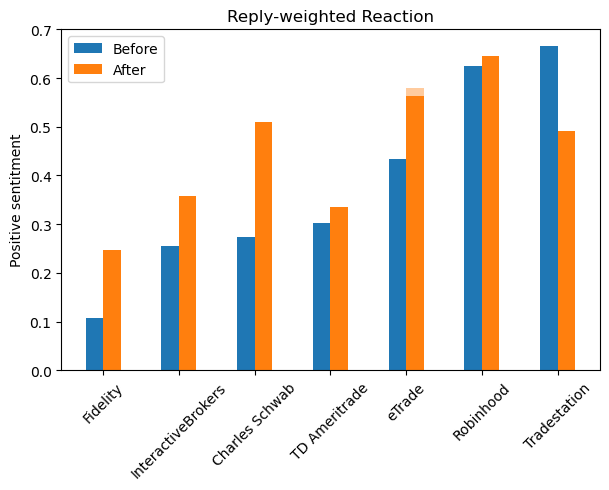

In [148]:
before=[retweetmean(search(lsum(discount[i][-10:-8]),['commission'])) for i in range(7)]
after=[retweetmean(search(lsum(discount[i][-8:-6]),['commission'])) for i in range(7)]
before[2]=retweetmean(search(lsum(discount[2][:-8]),['commission']))
after[2]=retweetmean(search(lsum(discount[2][-8:]),['commission']))

before=np.array(before)
after=np.array(after)

before1=before[np.argsort(before)]
after1=after[np.argsort(before)]
company1=companycopy[np.argsort(before)]

#before1[0],before1[5]=before1[5],before1[0]
#after1[0],after1[5]=after1[5],after1[0]
#company1[0],company1[5]=company1[5],company1[0]

after2=np.zeros(7)
after2[-3]=replymean(dsearch(lsum(discount[1][-8:-6]),['commission'],['otc']))-1

matplotlib.rcParams['figure.dpi']=100
fig, ax = plt.subplots()
x=np.arange(len(before))
width = 0.23
rects1 = ax.bar(x - width/2, np.array(before1)-1, width, label='Before')
rects2 = ax.bar(x + width/2, np.array(after1)-1, width, label='After')
ax.bar(x + width/2, np.array(after2), width,alpha=0.4,zorder=-1,color='C1')
ax.legend()
fig.tight_layout()
plt.xticks(np.arange(7),company1,rotation=45)
plt.ylabel('Positive sentitment')
plt.title('Reply-weighted Reaction')
plt.show()

In [113]:
company

['Charles Schwab',
 'eTrade',
 'Fidelity',
 'InteractiveBrokers',
 'Robinhood',
 'TD Ameritrade',
 'Tradestation']

In [105]:
print(np.array(before1)-1)
print(np.array(after1)-1)

[0.10810811 0.25454545 0.27272727 0.3030303  0.43478261 0.625
 0.66666667]
[0.24615385 0.35782748 0.50978136 0.33466934 0.56327543 0.646
 0.49180328]


In [96]:
before=np.array([replymean(search(lsum(discount[i][-10:-8]),['commission'])) for i in range(7)])
after=np.array([replymean(search(lsum(discount[i][-8:-6]),['commission'])) for i in range(7)])
before[2]=replymean(search(lsum(discount[2][:-8]),['commission']))
after[2]=replymean(search(lsum(discount[2][-8:]),['commission']))

before1=before[np.argsort(before)]
after1=after[np.argsort(before)]
company1=companycopy[np.argsort(before)]
before1[0],before1[5]=before1[5],before1[0]
after1[0],after1[5]=after1[5],after1[0]
company1[0],company1[5]=company1[5],company1[0]
for i in range(4):
    before1[i],before1[i+1]=before1[i+1],before1[i]
    after1[i],after1[i+1]=after1[i+1],after1[i]
    company1[i],company1[i+1]=company1[i+1],company1[i]

In [77]:
after2=np.zeros(7)
after2[3]=replymean(dsearch(lsum(discount[1][-8:-6]),['commission'],['otc']))-1

In [78]:
after2

array([0.        , 0.        , 0.        , 0.57902511, 0.        ,
       0.        , 0.        ])

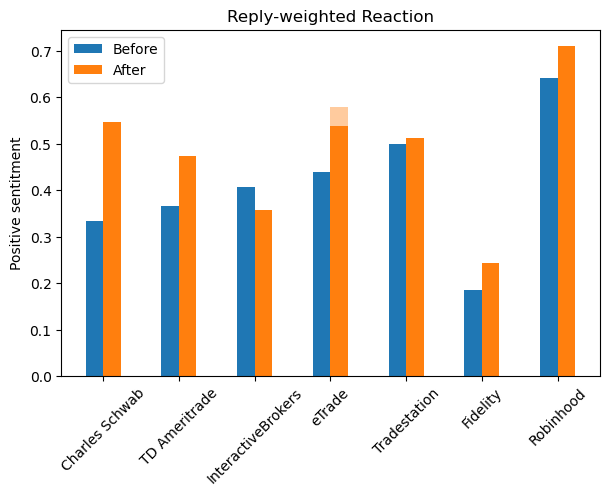

In [97]:
matplotlib.rcParams['figure.dpi']=100
fig, ax = plt.subplots()
x=np.arange(len(before))
width = 0.23
rects1 = ax.bar(x - width/2, np.array(before1)-1, width, label='Before')
rects2 = ax.bar(x + width/2, np.array(after1)-1, width, label='After')
ax.bar(x + width/2, np.array(after2), width,alpha=0.4,zorder=-1,color='C1')
ax.legend()
fig.tight_layout()
plt.xticks(np.arange(7),company1,rotation=45)
plt.ylabel('Positive sentitment')
plt.title('Reply-weighted Reaction')
plt.show()

### graph 3

Text(0.5, 1.0, 'Tweets of Commission Topic')

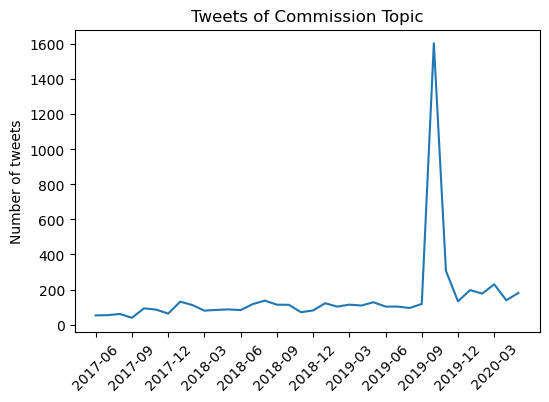

In [80]:
fig, ax1 = plt.subplots()
ax1.plot(np.array(m),[len(search(i,['commission'])) for i in metadata[1]])
ax1.set_xticks(np.arange(36))
ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
ax1.set_ylabel('Number of tweets')
for t in ax1.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax1.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
plt.title('Tweets of Commission Topic')

In [81]:
(search(lsum(discount[2][:-8]),['commission']))

[{'has_media': False,
  'hashtags': [],
  'img_urls': [],
  'is_replied': False,
  'is_reply_to': False,
  'likes': 1,
  'links': ['http://ow.ly/8Vsu30hKhKE'],
  'parent_tweet_id': '',
  'replies': 0,
  'reply_to_users': [],
  'retweets': 0,
  'screen_name': 'McgowanTerryG',
  'text': 'New Commission launches Texas Advocacy Coalitiondeclared the No  best state for business in  by Forbes the Coalition includes Top Area Employers American Airlines ATT BNSF Railway Fidelity Investments Texas Health Resources ',
  'text_html': '<p class="TweetTextSize js-tweet-text tweet-text" data-aria-label-part="0" lang="en">New Commission launches Texas Advocacy Coalition.....declared the No. 2 best state for business in 2017 by Forbes  -- the Coalition includes Top Area Employers - American Airlines, AT&amp;T, BNSF Railway, <strong>Fidelity Investments</strong>, Texas Health Resources.....  <a class="twitter-timeline-link" data-expanded-url="http://ow.ly/8Vsu30hKhKE" dir="ltr" href="https://t.co/pIKBd

In [82]:
(f(metadata[1][-8])+f(metadata[1][-7])+f(metadata[1][-6]))/(f(metadata[1][-9])+f(metadata[1][-10])+f(metadata[1][-11]))

1.378417086991718

In [83]:
replymean(dsearch(lsum(discount[1][-8:-6]),['commission'],['otc']))

1.5790251107828657

In [84]:
replymean(search(lsum(discount[1][-8:-6]),['commission']))

1.5394431554524362

In [85]:
text(andsearch(lsum(discount[1][-8:-6]),['commission','otc']))

98


[' OTC traders Commission is back etrade ',
 'As of today Etrades system is already showing zero commissions for OTC Yesterday it was still showing  ',
 'BBs StockHaven NorthShoreTrading ETrade no commissions for OTC but they still via',
 'Bullshit Indian givers now they say OTC isnt  commission trades now Smdh',
 'Charles Scwabb still has no commissions on OTC Opening an account today and buying long term call options I got a feeling business is about to pick up Buying puts on etrade',
 'CharlesSchwab still has free otc commissions Making etrade TDAmeritrade look less attractive for otc players',
 'Confirmed from an ETRADE exec OTC not included in free trade deal Thats not to say there arent individual deals being made by every broker but in general OTC trades are subject to the usual commissions',
 'DCGD I just entered a faux order to confirm zero commission Etrades system is now showing  for commission on OTC trades You can check it out yourselves AXXA PBHG SDRC ',
 'DCGD wait etrad

In [86]:
for i in range(7):
    print(posratio(search(lsum(discount[i][-9:-8]),['account'])))

0.3125
0.2923076923076923
0.0
0.13725490196078433
0.3017241379310345
0.22727272727272727
0.4


In [87]:
for i in range(7):
    print(posratio(search(lsum(discount[i][-7:-6]),['account'])))

0.22522522522522523
0.20430107526881722
0.5
0.06451612903225806
0.23308270676691728
0.24324324324324326
0.14285714285714285


In [88]:
text(search(lsum(discount[i][-7:-4]),['account']))

35


['  daily profit target cash account SINT    COCP   NNVC  MGEN  ',
 '  daily profit target er DGLY   NLNK         CORV  SLNO  Traded in wrong accountoops ',
 ' is excited to announce additional state approvals Residents of Illinois Rhode Island Washington and Wisconsin may now apply for a TradeStation Crypto account Lets trade learn more here',
 ' up k w AEMD on the day after being down k NNVC being reckless with a M paper trading account Pretty unrealistic trading but its good to be green Im resetting my account to k starting tomorrow ',
 'Can I Canadian open an account',
 'Have you compared your execution vs a normal account TradeStation',
 'Hello Please send us a private message with the email address or phone number associated with your account',
 'Hey heres a resolution for the Hold yourself accountable in  with a regimen of selfexamination journaling and rulecreation This blog article shows you how to start becoming more consistent in the market',
 'Hi Helmsman Please DM us with 

In [89]:
[text(search(i,['otc'])) for i in metadata[1]][-1]

25
15
36
33
29
102
34
73
35
32
35
29
48
32
30
36
44
38
49
19
37
38
35
39
42
37
63
29
410
55
42
51
47
57
76
82


['A lot of people want to get rid of their shares of JCPNQ but cant because they are using webull WeBull doesnt offer trading OTC Pros and cons to everything WeBull is great but you are limited It wont be like that forever but right now it is ETRADE is solid',
 'Ahhh gotcha Yeah if youre looking to trade and not just invest Robinhood is a good starting point Commission free',
 'Amazing case studies lined up today from KPIDigital GoAcoustic bigtincan cerosdotcom gumgum dunbradstreet brainshark highspot TDAmeritrade microsoft nresults workfront centurylink forrester ',
 'Anyone knows what TD Ameritrade charged for us to trade OTC Didnt see it on mobile SPOM TLSS SBES TOMZ',
 'Apparently they are going to OTC list If they do that they supose to appears on CharlesSchwab account',
 'AskRobinhood can we buy listed OTC stocks like CHPGF GBRRF on Robinhood I cant find active symbols on Robinhood but can on other brokers sites Please advise',
 'Batman I dont think RH trades OTC call them and se

In [90]:
text(search(lsum(temp[-2][-7:]),['']))

374


[' All those who got burned by RH Just go to TD Ameritrade Theyre commission free for stocks and only  for options contracts Tastyworks is another great one for a lot of options contracts as they cap at  per trade and free to close',
 ' CharlesSchwab TDAmeritrade Thanks for appreciating our accounts by allowing discounted and free trading The downside The commissions go up as your profits go up CNBC Theyre doing a hell of a job ',
 ' Interactive Brokers Lowest commissions  TD Ameritrade Best options tools  TradeStation Wellrounded offering My broker is TradeStation ',
 ' Schwab Seizes on Industry Turmoil With Plan to Buy TD Ameritrade Bloomberg First Charles Schwab Corp upended the retail brokerage business by cutting commissions to zero Now its seizing on the turmoil it unleashed to acquire one of its biggest rivals TD Am',
 ' The two day outage shows a severe lack of competence and will bring a loss of confidence You see there are alternatives such as commission free TDameritrade and

In [91]:
for i in search(lsum(temp[-2][-7:]),['']):
    if i['text']=='Yes my concern would be a return of trading commissions':
        print(i['tweet_url'])

/AntSquVI/status/1197600321150889984


In [92]:
text(search(lsum(temp[-1][:-8]),['veteran']))

9


[' now offers commissionfree trading for all US active military veterans and first responders ',
 'Active duty veterans and first responders get no commission fees for both stocks and options with Tradestation Trading heaven',
 'Also TradeStation got me to move my IRA accounts to them from you because they offered me a huge discount on commissions because of my veteran status We veterans are very loyal to companies and brands that give us discounts',
 'IB hands down for execution technology and reliability and relatively low commissions OTOH Tradestation has a really good platform and ZERO commissions if you are active military veteran or first responder Hard to beat ZERO if you trade a lot I do',
 'If youre a Veteran or st Responder TradeStation is free Everything Except Level  data etc fees But commissions are NADA Small on Futures and certain numbers of Options contracts but minimal',
 'Thanks Didnt know if it was TradeStation I have open an account with them and going to see how I 

NameError: name 'keyword_list' is not defined

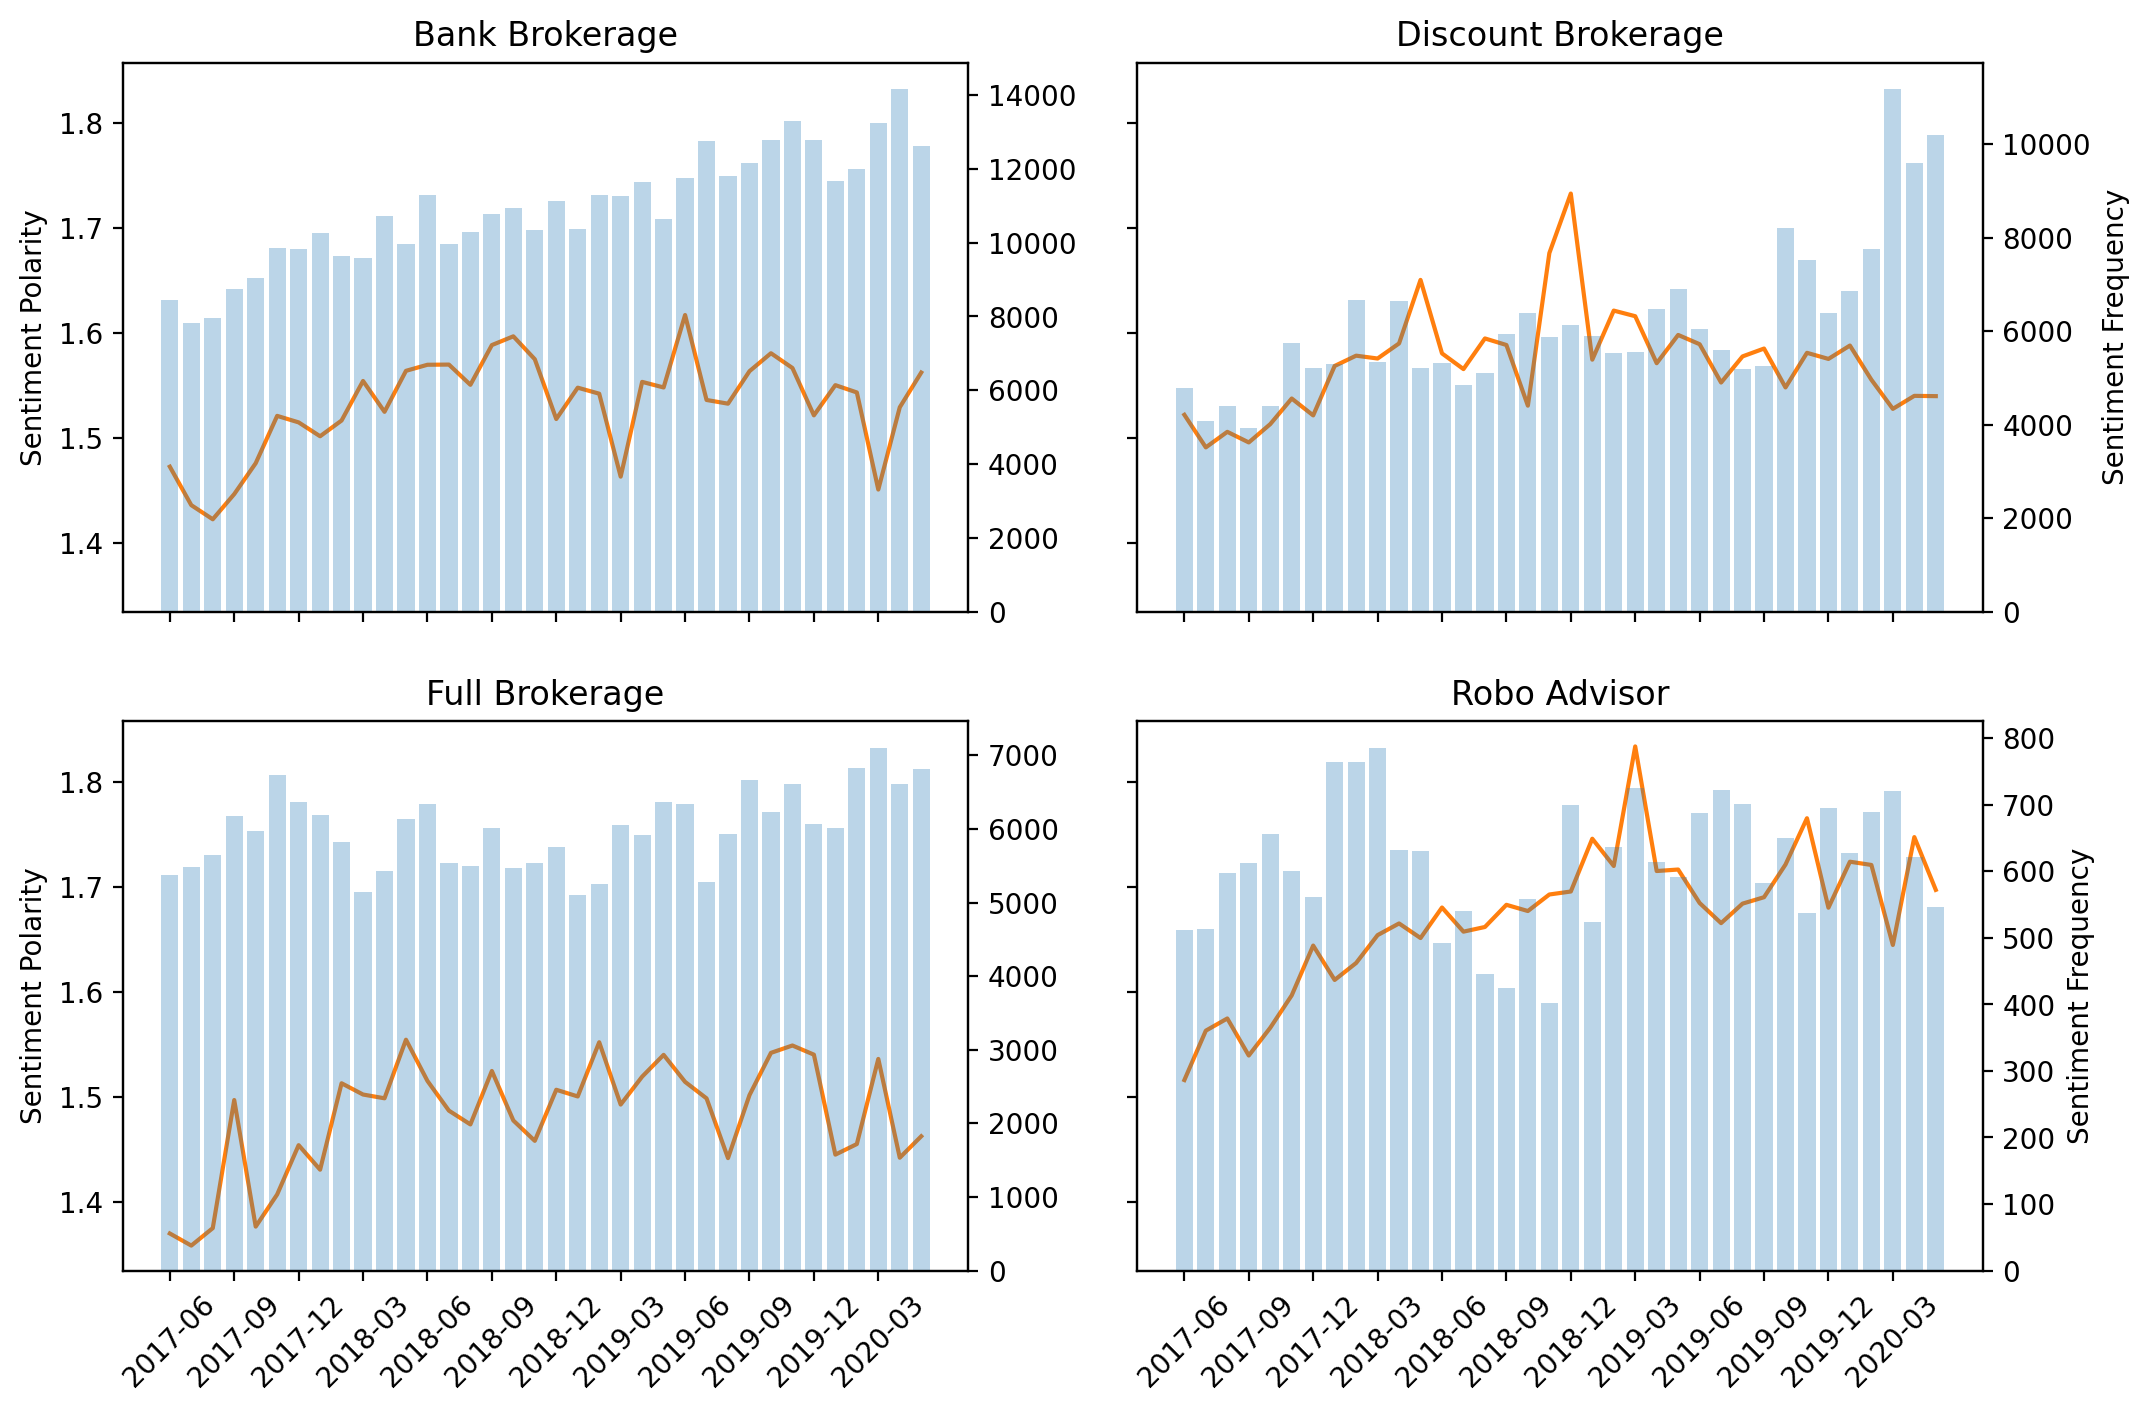

In [93]:
hint=0
app=[([replymean(j) for j in i],['hehe'],[f(j) for j in i]) for i in metadata]
matplotlib.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8))
for i in range(2):
    for j in range(2):
        temp=2*i+j

        ax[i][j].plot(np.array(m),app[temp][hint],color='C'+str(hint+1))
        ax[i][j].set_xticks(np.arange(36))
        ax[i][j].set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
        if not j:
            ax[i][j].set_ylabel('Sentiment Polarity')
        for t in ax[i][j].xaxis.get_ticklines():
            t.set_visible(False)
        for t in ax[i][j].xaxis.get_ticklines()[::2][::3]:
            t.set_visible(True)
        ax2 = ax[i][j].twinx()
        for t in ax2.xaxis.get_ticklines():
            t.set_visible(False)
        for t in ax2.xaxis.get_ticklines()[::2][::3]:
            t.set_visible(True)
        ax2.set_xticks(np.arange(36))
        ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
        ax2.bar(m,app[temp][2],alpha=0.3)
        if j:
            ax2.set_ylabel('Sentiment Frequency')
        ax[i][j].set_title(category[temp])
plt.suptitle('Keywords: '+', '.join(keyword_list[:3]))
plt.show()